In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [140]:
"""数据集加载"""
train_file_path = "../数据/train_data.csv"
train = pd.read_csv(train_file_path)
test_file_path = "../数据/test_data.csv"
test = pd.read_csv(test_file_path)
print("完整训练集大小是 {}".format(train.shape))
print("完整测试集大小是 {}".format(test.shape))
train.head(3), test.head(3)


完整训练集大小是 (2681, 8)
完整测试集大小是 (575, 8)


(   Unnamed: 0  cycle  capacity       SoH  resistance         CCCT  \
 0           0    1.0  1.126385  0.825175    0.094009  6613.059052   
 1           1    2.0  1.126160  0.815965    0.091661  6612.402800   
 2           2    3.0  1.125966  0.815977    0.094649  6608.560673   
 
           CVCT CS_Name  
 0  2251.498033  CS2_35  
 1  2231.967052  CS2_35  
 2  2228.216959  CS2_35  ,
    Unnamed: 0  cycle  capacity       SoH  resistance         CCCT  \
 0           0  630.0  0.870464  0.623609    0.093925  4762.384349   
 1           1  631.0  0.859885  0.614440    0.096180  4663.710466   
 2           2  632.0  0.833305  0.614332    0.099413  4636.225554   
 
           CVCT CS_Name  
 0  2565.172418  CS2_35  
 1  2599.623561  CS2_35  
 2  1628.032077  CS2_35  )

In [141]:
# train.drop("anonymous", axis = 1, inplace = True)
# test.drop("anonymous", axis = 1, inplace = True)
print("完整训练集大小是 {}".format(train.shape))
print("完整测试集大小是 {}".format(test.shape))
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SoH.values
dataset_df = pd.concat((train, test)).reset_index(drop=True)
# dataset_df.drop(['SoH'], axis=1, inplace=True)
print("all_data size is : {}".format(dataset_df.shape))
dataset_df.head()


完整训练集大小是 (2681, 8)
完整测试集大小是 (575, 8)
all_data size is : (3256, 8)


,Unnamed: 0,cycle,capacity,SoH,resistance,CCCT,CVCT,CS_Name
0,0,1.0,1.126385,0.825175,0.094009,6613.059052,2251.498033,CS2_35
1,1,2.0,1.126160,0.815965,0.091661,6612.402800,2231.967052,CS2_35
2,2,3.0,1.125966,0.815977,0.094649,6608.560673,2228.216959,CS2_35
3,3,4.0,1.118508,0.825194,0.091413,6604.732222,2247.561061,CS2_35
4,4,5.0,1.117210,0.806900,0.091413,6629.211049,2077.692393,CS2_35


In [142]:
"""缺失值分析"""
null_per = dataset_df.isnull().sum()
null_per[null_per > 0].sort_values(ascending=False)


CVCT    42
dtype: int64

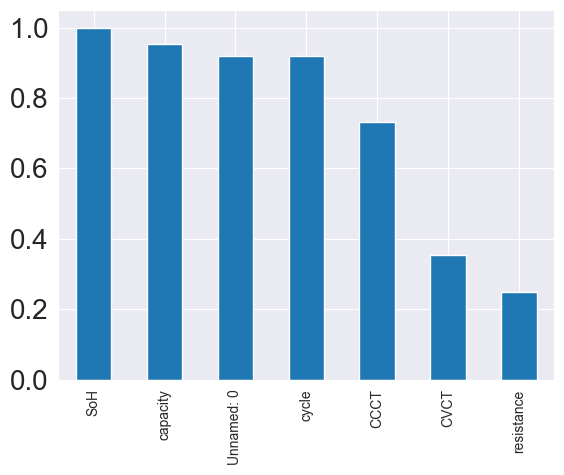

In [143]:
"""相关性分析"""

import matplotlib.pyplot as plt
import pandas as pd

# 选择数值型的列
numeric_train = train.select_dtypes(include=[np.number])

# 计算相关系数
corr_matrix = numeric_train.corr()

# 提取与 SalePrice 列相关的绝对相关系数，并排序
sorted_corr = abs(corr_matrix['SoH']).sort_values(ascending=False)

# 绘制条形图
sorted_corr.plot.bar()
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)

# 显示图形
plt.show()

<Figure size 1200x800 with 0 Axes>

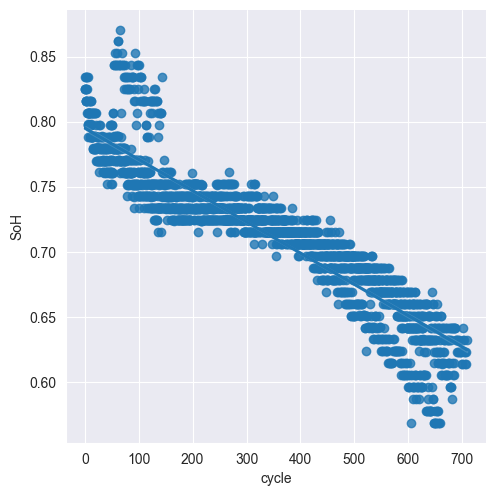

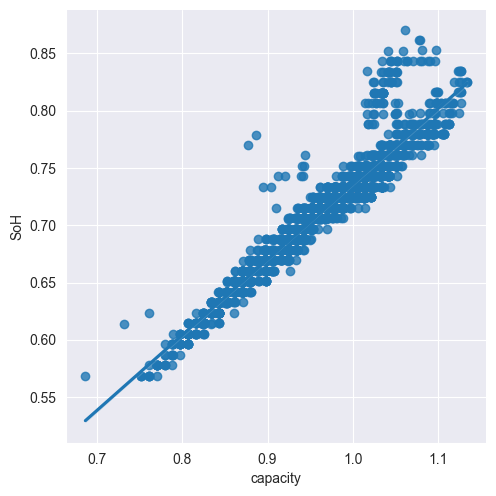

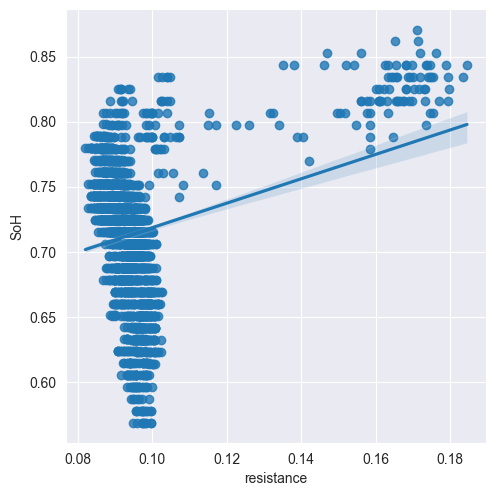

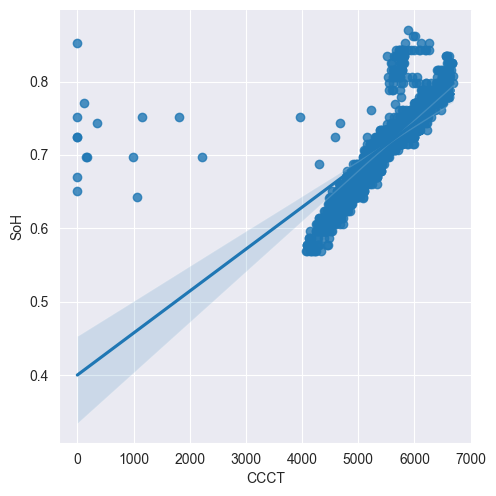

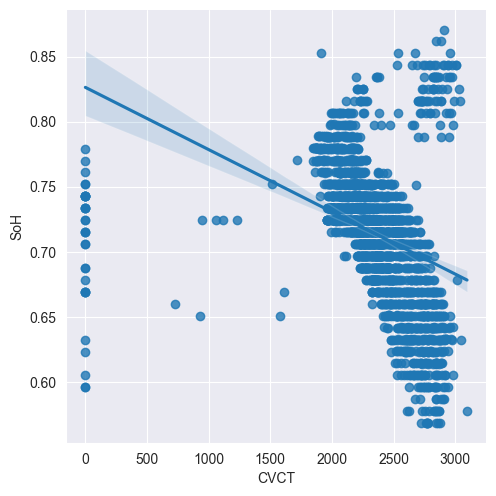

In [144]:
"""异常值分析"""
figure=plt.figure(figsize=(12, 8))
pair_grid1=sns.pairplot(x_vars=['cycle'],y_vars=['SoH'],
             data=train,dropna=True,size=5,kind="reg")
pair_grid2=sns.pairplot(x_vars=['capacity'],y_vars=['SoH'],
             data=train,dropna=True,size=5,kind="reg")
pair_grid3=sns.pairplot(x_vars=['resistance'],y_vars=['SoH'],
             data=train,dropna=True,size=5,kind="reg")
pair_grid4=sns.pairplot(x_vars=['CCCT'],y_vars=['SoH'],
             data=train,dropna=True,size=5,kind="reg")
pair_grid5=sns.pairplot(x_vars=['CVCT'],y_vars=['SoH'],
             data=train,dropna=True,size=5,kind="reg")


plt.show()

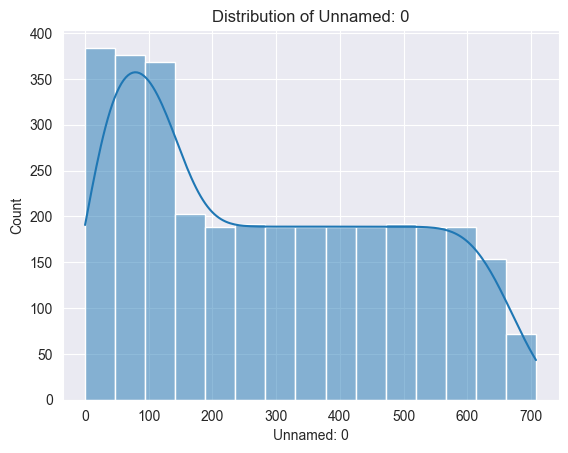

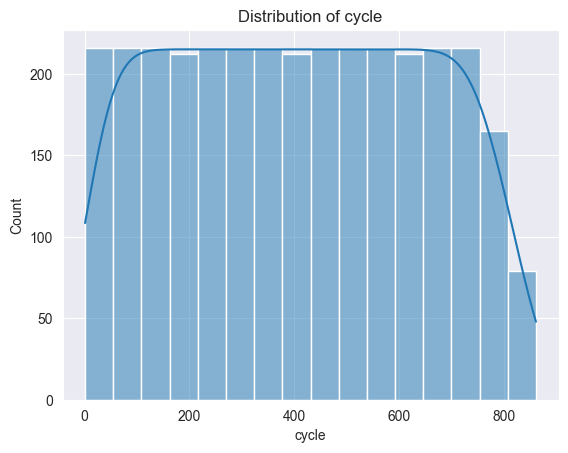

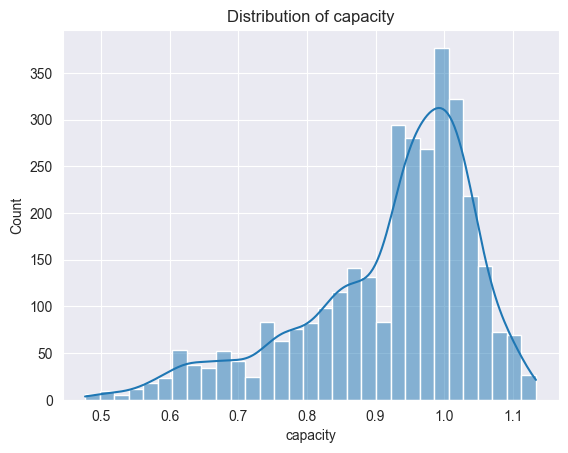

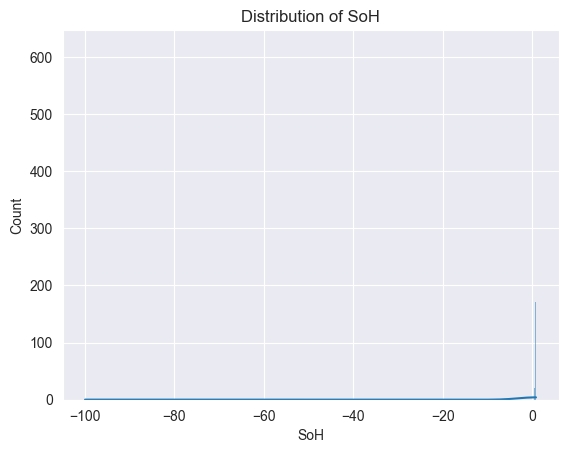

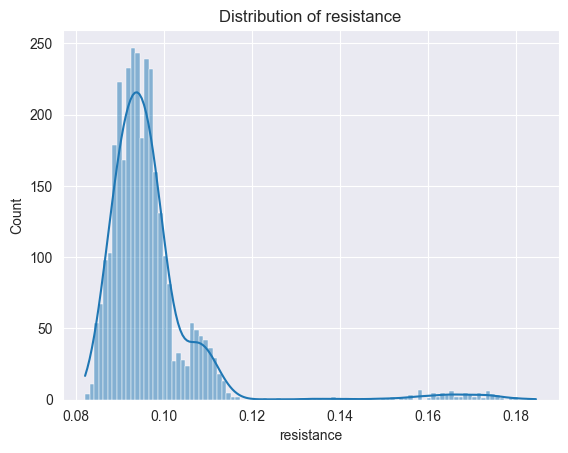

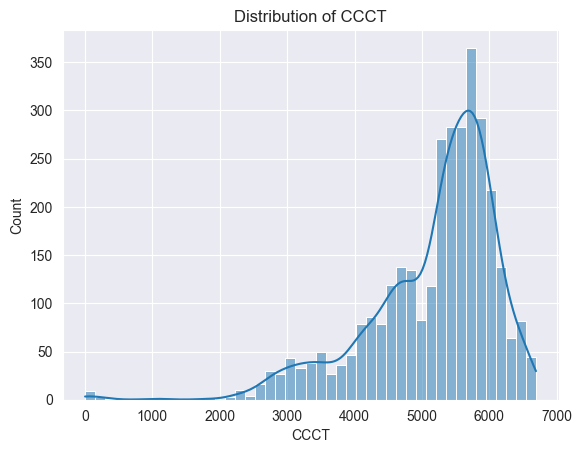

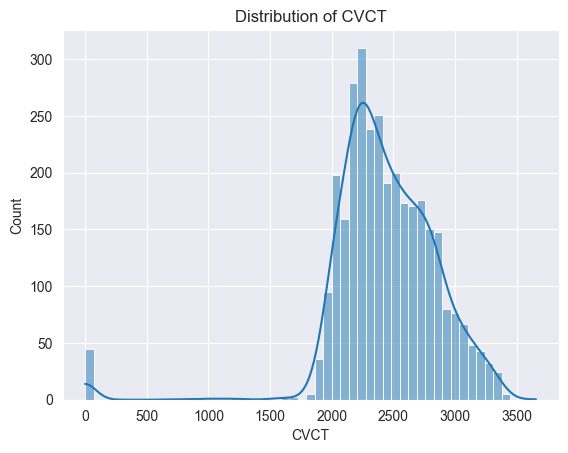

In [145]:
"""数值型特征分布分析"""
df_num = dataset_df.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
df_num.head(3)
# 对数值型 DataFrame 中的每个特征绘制分布图
for column in df_num.columns:
    sns.histplot(df_num[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

mu = 0.71 and sigma = 0.05


Text(0.5, 1.0, 'SoH distribution')

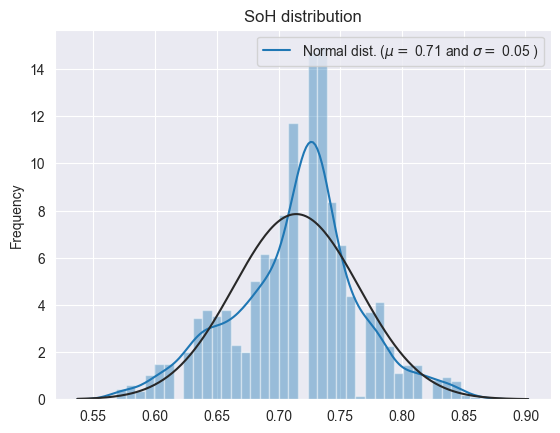

In [146]:
"""SoH分布分析"""
sns.distplot(y_train,fit=norm);
(mu,sigma) = norm.fit(y_train)
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SoH distribution')


In [147]:
"""缺失值填充"""
# process null value
# 首先，创建一个函数来计算前五个和后五个数据的平均值
def rolling_window_avg(series, window_size=5):
    return series.rolling(window=window_size * 2 + 1, min_periods=1, center=True).mean()

# 应用这个函数到CVCT列
dataset_df['CVCT_rolling_avg'] = rolling_window_avg(dataset_df['CVCT'])

# 现在，我们有了一个新的列CVCT_rolling_avg，它包含了每个数据点的前五个和后五个数据的平均值
# 接下来，我们用这个新列来填充原始CVCT列的缺失值
dataset_df['CVCT'] = dataset_df.apply(lambda row: row['CVCT_rolling_avg'] if pd.isna(row['CVCT']) else row['CVCT'], axis=1)

dataset_df.drop(['CVCT_rolling_avg'], axis=1, inplace=True)
dataset_df.head(100)

,Unnamed: 0,cycle,capacity,SoH,resistance,CCCT,CVCT,CS_Name
0,0,1.0,1.126385,0.825175,0.094009,6613.059052,2251.498033,CS2_35
1,1,2.0,1.126160,0.815965,0.091661,6612.402800,2231.967052,CS2_35
2,2,3.0,1.125966,0.815977,0.094649,6608.560673,2228.216959,CS2_35
3,3,4.0,1.118508,0.825194,0.091413,6604.732222,2247.561061,CS2_35
4,4,5.0,1.117210,0.806900,0.091413,6629.211049,2077.692393,CS2_35
...,...,...,...,...,...,...,...,...
95,95,96.0,1.016196,0.751706,0.092305,1800.907467,2226.930246,CS2_35
96,96,97.0,1.015519,0.751713,0.092305,3954.826842,2218.207348,CS2_35
97,97,98.0,1.014264,0.751727,0.093840,5913.553310,2217.348202,CS2_35
98,98,99.0,1.022954,0.742641,0.090686,5899.742220,2214.817269,CS2_35


In [148]:
dataset_df.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset_df.drop(['SoH'], axis=1, inplace=True)
dataset_df.head(100)


,cycle,capacity,resistance,CCCT,CVCT,CS_Name
0,1.0,1.126385,0.094009,6613.059052,2251.498033,CS2_35
1,2.0,1.126160,0.091661,6612.402800,2231.967052,CS2_35
2,3.0,1.125966,0.094649,6608.560673,2228.216959,CS2_35
3,4.0,1.118508,0.091413,6604.732222,2247.561061,CS2_35
4,5.0,1.117210,0.091413,6629.211049,2077.692393,CS2_35
...,...,...,...,...,...,...
95,96.0,1.016196,0.092305,1800.907467,2226.930246,CS2_35
96,97.0,1.015519,0.092305,3954.826842,2218.207348,CS2_35
97,98.0,1.014264,0.093840,5913.553310,2217.348202,CS2_35
98,99.0,1.022954,0.090686,5899.742220,2214.817269,CS2_35


In [149]:

"""异常值清理"""

train = train.drop(train[(train['CCCT'] < 2000)].index)
train = train.drop(train[(train['CVCT'] < 1000)].index)


In [150]:
"""对CS_name进行独热编码"""
dataset_df = pd.get_dummies(dataset_df)
dataset_df.head(3)

,cycle,capacity,resistance,CCCT,CVCT,CS_Name_CS2_35,CS_Name_CS2_36,CS_Name_CS2_37,CS_Name_CS2_38
0,1.0,1.126385,0.094009,6613.059052,2251.498033,True,False,False,False
1,2.0,1.126160,0.091661,6612.402800,2231.967052,True,False,False,False
2,3.0,1.125966,0.094649,6608.560673,2228.216959,True,False,False,False


In [151]:

"""训练测试集分隔"""
clean_train = dataset_df[:ntrain]
clean_test = dataset_df[ntrain:]
# filtered_df.to_csv('../数据/filtered_test_set.csv', index=False)
# print(filtered_df)

clean_train = pd.concat([clean_train, pd.Series(y_train, name='SoH')], axis=1)
clean_train.shape,clean_test.shape

((2681, 10), (575, 9))

In [152]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

X = clean_train.drop(columns='SoH')
y = clean_train['SoH']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=10)
print(y)

0       0.825175
1       0.815965
2       0.815977
3       0.825194
4       0.806900
          ...   
2676    0.623295
2677    0.614129
2678    0.614140
2679    0.623300
2680    0.632475
Name: SoH, Length: 2681, dtype: float64


In [153]:
# 定义交叉验证模式
kf = KFold(n_splits=10, random_state=50, shuffle=True)

warnings.filterwarnings('ignore')
# 建立基线模型
lgb = LGBMRegressor(objective='regression', random_state=50)
xgb = XGBRegressor(objective='reg:squarederror',random_state=50)
ridge = make_pipeline(RobustScaler(), RidgeCV(cv=kf))
svr = make_pipeline(RobustScaler(), SVR())
gbr = GradientBoostingRegressor(random_state=50)
rf = RandomForestRegressor(random_state=50)
# 基线模型评估
models = [lgb, xgb, ridge, svr, gbr, rf]
model_names = ['lgb','xgb','ridge','svr','gbr','rf']




In [166]:
"""模型均值融合"""
def blending(X, y, test):
    lgb.fit(X, y)
    lgb_pred = lgb.predict(test)
    #
    xgb.fit(X, y)
    xgb_pred = xgb.predict(test)

    ridge.fit(X, y)
    ridge_pred = ridge.predict(test)

    svr.fit(X, y)
    svr_pred = svr.predict(test)

    gbr.fit(X, y)
    gbr_pred = gbr.predict(test)

    rf.fit(X, y)
    rf_pred = rf.predict(test)


    # 加权求和
    # blended_pred = (0.2 * lgb_pred +
    #                 0.2 * xgb_pred +
    #                 0.1 * ridge_pred +
    #                 0.05 * svr_pred +
    #                 0.3 * gbr_pred +
    #                 0.15 * rf_pred
    #                 )
    blended_pred = rf_pred
    return blended_pred
def rmse(y, y_pred):
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return rmse
blended_pred = blending(Xtrain, ytrain, Xtest)
blending_score = rmse(ytest, blended_pred)
print(blending_score)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 1876, number of used features: 9
[LightGBM] [Info] Start training from score 0.713756
0.005251264307270301


In [168]:
"""结果注册"""
sample_submission_df = pd.read_csv('../结果/submission.csv')
sample_submission_df['result'] = blending(X, y, clean_test)
sample_submission_df.to_csv('../结果/submission_1.csv', index=False)
sample_submission_df.head(120)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 2681, number of used features: 9
[LightGBM] [Info] Start training from score 0.714362


,Unnamed: 0,cycle,CS_Name,result
0,0,630,CS2_35,0.638437
1,1,631,CS2_35,0.637092
2,2,632,CS2_35,0.623238
3,3,633,CS2_35,0.608179
4,4,634,CS2_35,0.618719
...,...,...,...,...
115,115,745,CS2_35,0.574856
116,116,746,CS2_35,0.574856
117,117,747,CS2_35,0.574856
118,118,748,CS2_35,0.574856


In [155]:
print("over")